In [1]:
from src.datasets import ChesapeakeRSC
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def preprocess(sample):
    sample["image"] = sample["image"].float() / 255
    return sample

ds = ChesapeakeRSC("data/ChesapeakeRSC/", split="train", differentiate_tree_canopy_over_roads=True, transforms=preprocess)

In [9]:
len(ds)

24000

In [10]:
def custom_plot(sample, mask_only=False):
    img = sample["image"].numpy().transpose(1, 2, 0)[:, :, :3]
    mask = sample["mask"].numpy()

    img_masked = img.copy()

    img_masked[mask == 1] += np.array([0.0, 0.0, 0.5])
    img_masked[mask == 2] += np.array([0.5, 0.0, 0.0])
    img_masked[img_masked > 1] = 1


    n_cols = 2
    width = 10
    if mask_only:
        n_cols = 1
        width = 5

    fig, axs = plt.subplots(1, n_cols, figsize=(width, 5))
    if not isinstance(axs, np.ndarray):
        axs = [axs]

    if mask_only:
        axs[0].imshow(img_masked)
    else:
        axs[0].imshow(img)
        axs[1].imshow(img_masked)
    for ax in axs:
        ax.axis("off")
    plt.tight_layout()
    plt.show()
    plt.close()



13827


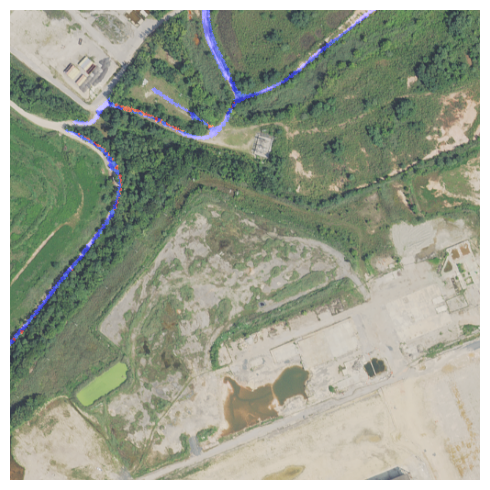

1098


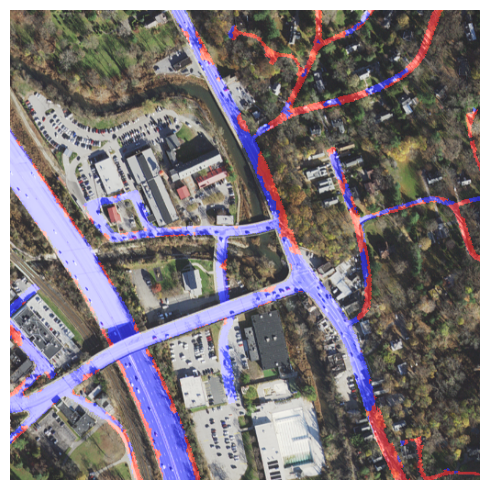

6474


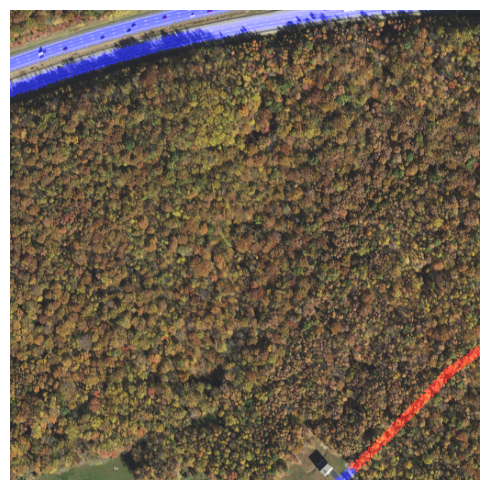

11436


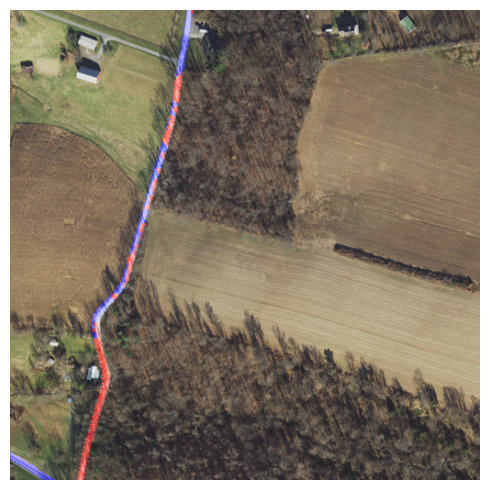

1541


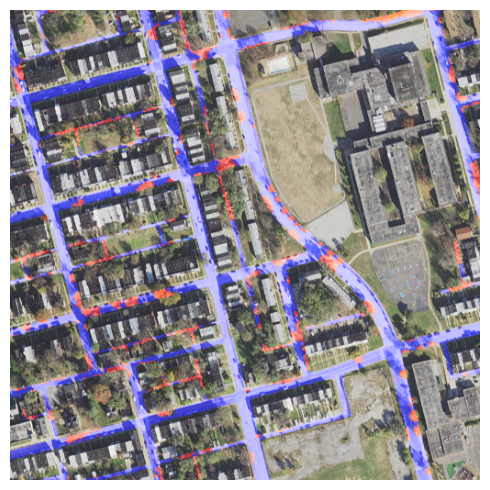

3408


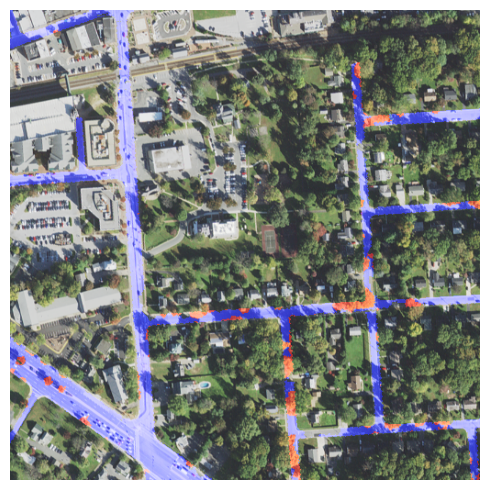

23187


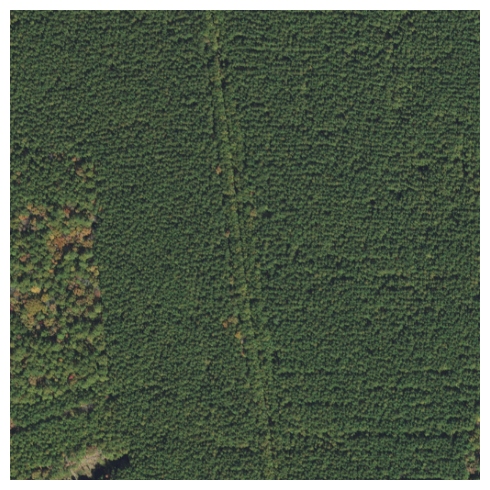

18464


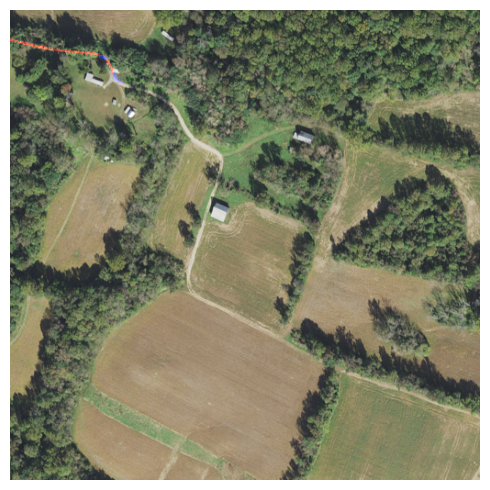

5194


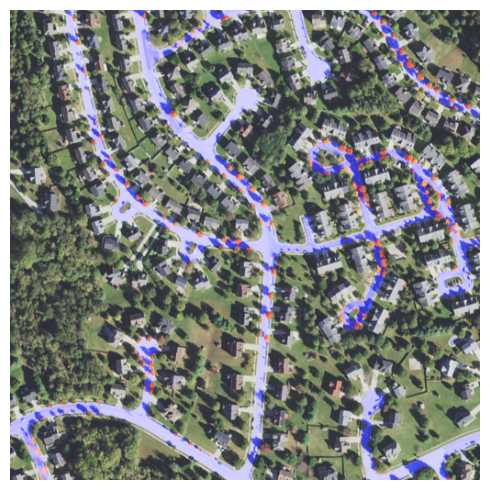

17702


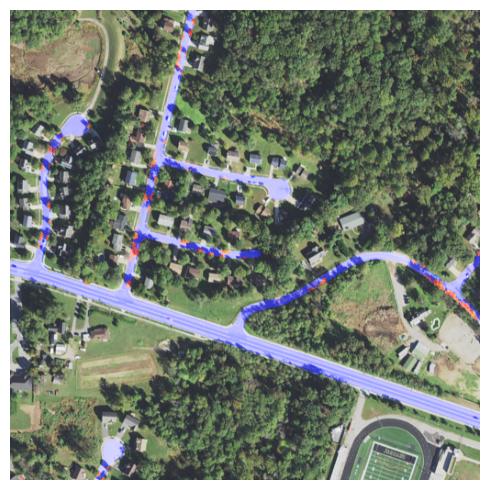

In [11]:
for i in np.random.choice(len(ds), 10):
    print(i)
    custom_plot(ds[i], mask_only=True)